In [1]:
import geopandas as gpd

import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent# 找出根目錄：Path.cwd()找出現在所在目錄(/run).parent(上一層是notebook).parent(再上層一層business_district_discovery)
print(PROJECT_ROOT)
sys.path.append(str(PROJECT_ROOT))

from matplotlib.font_manager import fontManager
import matplotlib as mlp
FONT_PATH = PROJECT_ROOT / "ChineseFont.ttf"
fontManager.addfont(str(FONT_PATH))
mlp.rcParams["font.family"] = "ChineseFont"

import warnings
warnings.filterwarnings('ignore')

c:\labs\geo-grid


In [2]:
from utils.helper_grid import build_projected_grid, plot_local_grid_by_targets

In [3]:
# 建置方格
shp_path = r"C:\labs\geo-grid\SHP\TOWN-TW97-LL\TOWN_MOI_1140318.shp"
gdf_tm2, grid300 = build_projected_grid(
    shp_path,
    cell_size=300,
    clip_mode="filter",
    id_scheme="xy",
)

原始 CRS: GEOGCS["GCS_TWD97[2020]",DATUM["Taiwan_Datum_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1026"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
投影後 CRS: EPSG:3826
raw bounds: (-478697.9750981217, 1154437.1676869274, 606876.4178154243, 2919550.9734143284)
aligned bounds: (-478800.0, 1154400.0, 606900.0, 2919600.0)
cell_size: 300m
clip_mode: filter
grid cells: 413,919
grid columns: ['grid_id', 'grid_col', 'grid_row', 'geometry']


In [ ]:
# === 儲存 ===
save_path_grid = r"C:\labs\geo-grid\data\output_grid\grid300.parquet"
save_path_gdf = r"C:\labs\geo-grid\data\output_grid\gdf_tm2.parquet"
grid300.to_parquet(save_path_grid)
gdf_tm2.to_parquet(save_path_gdf)

print(f"已儲存至: {save_path_grid}")
print(f"已儲存至: {save_path_gdf}")

# === 讀取 ===
grid300_loaded = gpd.read_parquet(save_path_grid)
gdf_tm2_loaded = gpd.read_parquet(save_path_gdf)

已儲存至: C:\labs\geo-grid\data\output_grid\grid300.parquet


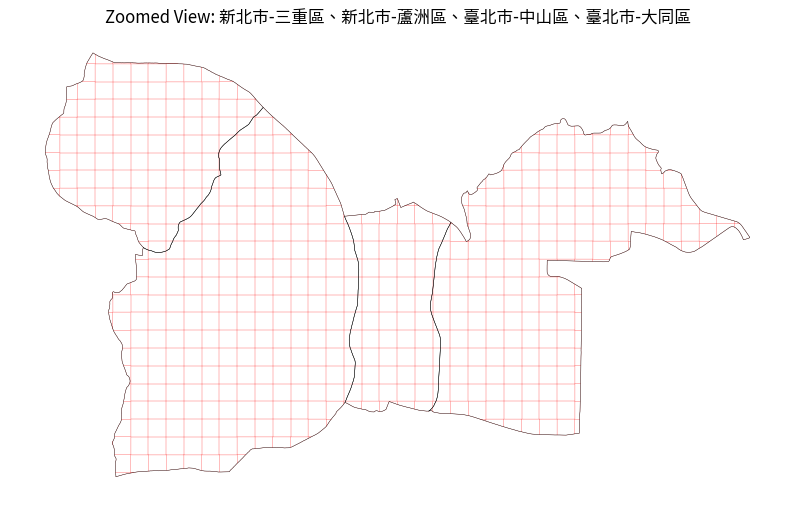

In [7]:
# 檢視特定區域的方格
local_grid = plot_local_grid_by_targets(
    town_gdf=gdf_tm2_loaded,
    grid_gdf=grid300_loaded,
    targets=[
        ("新北市", "三重區"),
        ("新北市", "蘆洲區"),
        ("臺北市", "中山區"),
        ("臺北市", "大同區")
    ],
    show_labels=False,
    town_linewidth=0.3,
    grid_linewidth=0.1,
)